<a href="https://colab.research.google.com/github/Anastasiia-osp/RUDN/blob/main/%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа №1

Вариационный ряд:  [ 0  0  0  1  1  1  1  1  1  1  2  2  2  2  2  3  3  3  4  5  5  5  5  6
  6  6  6  7  7  7  8  8  8  8  8  9  9  9  9  9  9 10 10 10 10 10 10 10
 11 11]
Размер ряда:  50
Статистический ряд:      Значения z_j  Частоты n_j  Относительные частоты n_j/n
0              0            3                         0.06
1              1            7                         0.14
2              2            5                         0.10
3              3            3                         0.06
4              4            1                         0.02
5              5            4                         0.08
6              6            4                         0.08
7              7            3                         0.06
8              8            5                         0.10
9              9            6                         0.12
10            10            7                         0.14
11            11            2                         0.04
Размах:  11
Длина инте

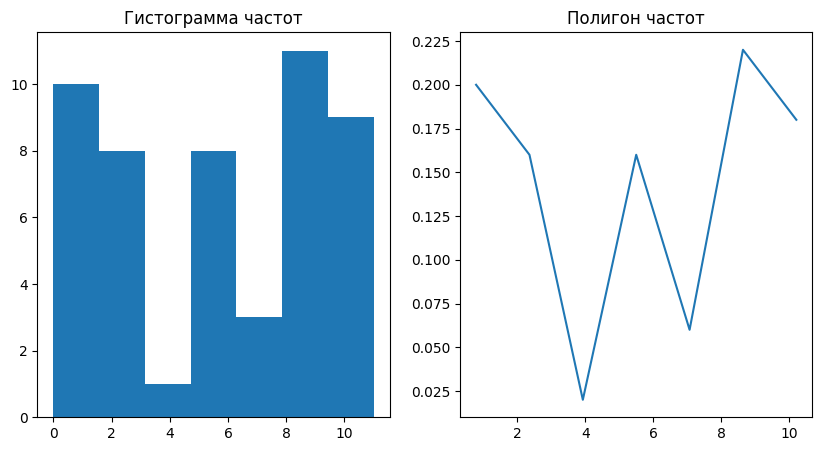

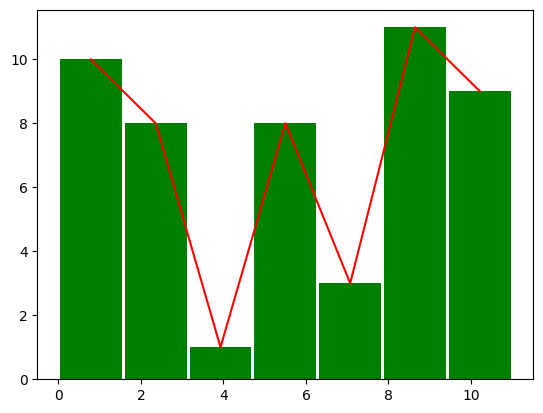

Математическое ожидание исходной выборки:  5.62
Математическое ожидание интервально группированной выборки:  7.142857142857143
Несмещенная дисперсия исходной выборки:  12.852653061224489
Смещенная дисперсия исходной выборки:  12.5956
Несмещенная дисперсия интервально группированной выборки:  13.809523809523808
Смещенная дисперсия интервально группированной выборки:  11.836734693877549
Медиана исходной выборки:  6.0
Медиана интервально группированной выборки:  8.0
    Значения z_j  Частоты n_j  Относительные частоты n_j/n
1              1            7                         0.14
10            10            7                         0.14
   Начало интервала  Конец интервала  Частота  Середина интервала  \
5          7.857143         9.428571       11            8.642857   

   Относительная частота  
5                   0.22  


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = [1,2,9,5,1,4,8,3,2,0,11,5,8,2,3,8,2,9,5,8,10,9,10,1,10,2,1,6,5,1,0,7,7,9,0,6,1,10,3,8,6,9,1,7,9,11,10,6,10,10]

## 1.1
# Построим вариационный ряд
var_data = np.sort(data)
print('Вариационный ряд: ', var_data)

# Построим статистический ряд
n = len(var_data)
print('Размер ряда: ', n)

stat_ryad = pd.DataFrame(var_data, columns=['data'])
stat_ryad = stat_ryad.groupby(['data'], as_index=False).value_counts()
stat_ryad.columns = ['Значения z_j', 'Частоты n_j']
stat_ryad['Относительные частоты n_j/n'] = stat_ryad['Частоты n_j'] / n

print('Статистический ряд: ', stat_ryad)

# Найдем размах
var_range = var_data[-1] - var_data[0]
print('Размах: ',var_range)

## 1.2
# Построим таблицу частот группированной выборки, сделав семь интервалов одинаковой длины
interval_length = var_range / 7
print(f'Длина интервала: ~{interval_length : .2f}')

# Создадим интервалы
intervals = []
for i in range(7):
    intervals.append([var_data[0] + interval_length * i, var_data[0] + interval_length * (i + 1)])

print('Интервалы: ', intervals)

# Создадим таблицу интервалов и частот
intervals_table = pd.DataFrame(intervals, columns=['Начало интервала', 'Конец интервала'])
intervals_table['Частота'] = 0

for i in range(len(intervals_table)):
    for j in range(len(var_data)):
        if i != len(intervals_table) - 1:
            if var_data[j] >= intervals_table.iloc[i, 0] and var_data[j] < intervals_table.iloc[i, 1]:
                intervals_table.iloc[i, 2] += 1
        else:
            if var_data[j] >= intervals_table.iloc[i, 0] and var_data[j] <= intervals_table.iloc[i, 1]:
                intervals_table.iloc[i, 2] += 1

# Найдем середину интервалов
intervals_table['Середина интервала'] = (intervals_table['Начало интервала'] + intervals_table['Конец интервала']) / 2

# Найдем относительные частоты
intervals_table['Относительная частота'] = intervals_table['Частота'] / n

print(intervals_table)

## 1.3
# Построим полиго и гистограмму частот, эмпирическую функцию распределения
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(var_data, bins=7)
plt.title('Гистограмма частот')
plt.subplot(1, 2, 2)
plt.plot(intervals_table['Середина интервала'], intervals_table['Относительная частота'])
plt.title('Полигон частот')
plt.show()

plt.bar(x = intervals_table['Середина интервала'],height = intervals_table['Частота'], color = 'green', width = 1.5)
plt.plot(intervals_table['Середина интервала'],intervals_table['Частота'], color = 'red')
plt.show()

## 1.4
# Найти математическое ожидание и дисперсию (смещенную и несмещенную), медиану и моду для исходной и интервально группированной выборок
print('Математическое ожидание исходной выборки: ', np.mean(data))
print('Математическое ожидание интервально группированной выборки: ', np.mean(intervals_table['Частота']))

variance = 0
for i in range(len(data)):
    variance += (data[i] - np.mean(data))**2

print('Несмещенная дисперсия исходной выборки: ', variance / (len(data) - 1))
print('Смещенная дисперсия исходной выборки: ', variance / len(data))

variance = 0
for i in range(len(intervals_table)):
    variance += (intervals_table['Частота'][i] - np.mean(intervals_table['Частота']))**2

print('Несмещенная дисперсия интервально группированной выборки: ', variance / (len(intervals_table) - 1))
print('Смещенная дисперсия интервально группированной выборки: ', variance / len(intervals_table))

print('Медиана исходной выборки: ', np.median(data))
print('Медиана интервально группированной выборки: ', np.median(intervals_table['Частота']))

# Распределение - бимодальное; для исходной выборки моды:
print(stat_ryad[stat_ryad['Частоты n_j'] == stat_ryad['Частоты n_j'].max()])

# для интервальной группированной выборки моды:
print(intervals_table[intervals_table['Частота'] == intervals_table['Частота'].max()])
